<a href="https://colab.research.google.com/github/raviteja-padala/Machine-Learning-Algorithms/blob/main/K_Means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K means Clustering

 K-Means clustering is a unsupervised machine learning algorithm used for **grouping/clustering** similar data points into clusters. Here's a step-by-step explanation in simple terms:

1. **Choose the Number of Clusters (K)**:
   Decide how many clusters you want to divide your data into. This is often based on your domain knowledge or by using techniques like the elbow method, which involves plotting the Within-Cluster Sum of Squares (WCSS) against different values of K and choosing the "elbow" point where the rate of decrease slows down.

2. **Initialize Cluster Centers**:
   Randomly select K data points as initial cluster centers. These points will act as the "center" of each cluster.

3. **Assign Data Points to Clusters**:
   For each data point, calculate its distance to each of the K cluster centers. Assign the data point to the cluster whose center is closest. This forms initial clusters.

4. **Update Cluster Centers**:
   Recalculate the new cluster centers by taking the mean of all data points assigned to each cluster. This moves the cluster centers towards the center of their respective clusters.

5. **Repeat Steps 3 and 4**:
   Repeat the assignment and update steps until the cluster centers stabilize and no significant change in assignments or centers occurs. This is often determined by a convergence criteria.

6. **Final Clusters**:
   The algorithm stops when cluster centers no longer change significantly. At this point, you have your final clusters. Each data point belongs to the cluster whose center it is closest to.

K-Means tries to minimize the distance between data points and their assigned cluster centers. The result is that data points within the same cluster are similar to each other, and points in different clusters are dissimilar.

It's important to note that K-Means is sensitive to initial cluster center selection, and it might converge to local minima. Multiple initializations and averaging results can help mitigate this issue.

In summary, K-Means clustering aims to group data points into clusters by iteratively assigning points to the nearest cluster center and updating the centers to optimize the grouping. It's a relatively simple yet powerful algorithm for finding patterns in data.

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#import data
df  =  pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/kmeans/student_clustering.csv')

In [ ]:
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


In [ ]:
df.shape

(200, 2)

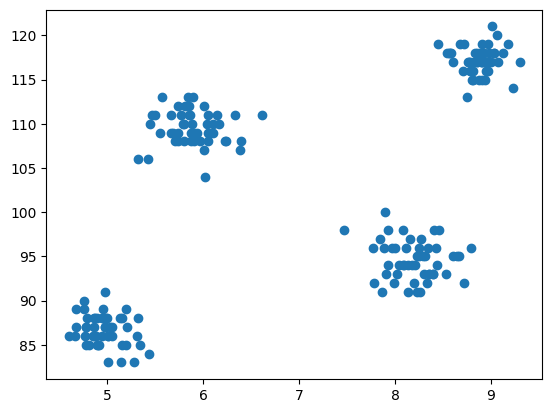

In [ ]:
#plot to view data
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'])

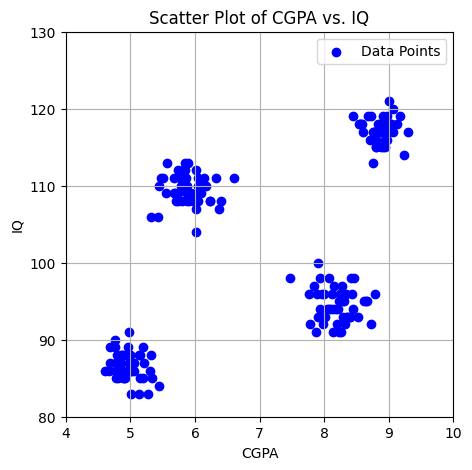

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))  # Adjust the figure size as needed

# Scatter plot with customization
plt.scatter(df['cgpa'], df['iq'], color='blue', marker='o', label='Data Points')

# Adding labels and title
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('Scatter Plot of CGPA vs. IQ')

# Setting axis limits
plt.xlim(4, 10)  # Adjust the limits as needed
plt.ylim(80, 130)  # Adjust the limits as needed

# Adding grid lines
plt.grid(True)

# Adding legend
plt.legend()

plt.show()


# Feature scaling

In [ ]:
cols = df.columns

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(df)

In [ ]:
df1 = pd.DataFrame(X, columns=[cols])

In [ ]:
df1.head()

,cgpa,iq
0,-1.144049,-1.153641
1,-0.668751,0.907168
2,0.849734,-0.741479
3,0.794180,-0.411750
4,-0.946522,0.659871


In [ ]:
#loading k means library
from sklearn.cluster import KMeans

# Finding WCSS values

In [ ]:
wcss = []  # Create an empty list to store the WCSS values

for i in range(1, 11):  # Loop through the number of clusters from 1 to 10
    km = KMeans(n_clusters=i)  # Create a KMeans clustering model with 'i' clusters
    km.fit_predict(df1)  # Fit the model and predict cluster assignments for the data
    wcss.append(km.inertia_)  # Append the WCSS value to the list


In [ ]:
#wcss list
wcss

[400.0,
 190.80730946983084,
 96.90259010500822,
 8.477237626556295,
 7.320105021828803,
 6.428455467466861,
 5.746670580679476,
 5.1744671812176435,
 4.569868672913114,
 4.14770104511322]

# Plot WCSS values to Choose the Number of Clusters (K)

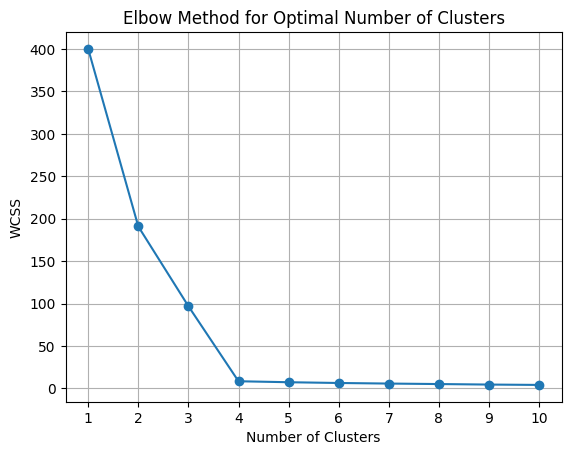

In [ ]:

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))  # Set x-axis ticks to match the cluster range
plt.grid(True)

plt.show()


When you plot the WCSS values against the number of clusters, you'll often see a graph that resembles an "elbow," where the WCSS decreases steeply at first and then starts to level off. The point at which the decrease slows down is usually a good candidate for the optimal number of clusters, as it represents a good balance between capturing meaningful clusters in the data while avoiding overfitting.

# Initialize Cluster Centers:

In [ ]:
X = df1.iloc[:,:].values # storing the data in df as a numpy array in variable X for better ease of work

km = KMeans(n_clusters=4) #initializing the argument n_clusters=4, which indicates that we want to find 4 clusters in the data.

# Assign Data Points to Clusters

In [ ]:
y_means = km.fit_predict(X)
# km.fit_predict method fits the K-Means model to the data in X and assigns each data point to one of the identified clusters.
# The result is an array y_means where each element represents the cluster assignment (label) of the corresponding data point in the X array.

In [ ]:
y_means

array([0, 2, 1, 1, 2, 2, 1, 3, 2, 1, 0, 2, 1, 0, 2, 1, 2, 1, 2, 2, 1, 0,
       1, 0, 0, 1, 0, 3, 1, 2, 3, 2, 3, 2, 1, 1, 3, 2, 0, 2, 0, 1, 1, 0,
       3, 3, 1, 2, 3, 2, 0, 0, 3, 1, 3, 2, 2, 3, 2, 3, 2, 1, 1, 3, 0, 3,
       1, 0, 2, 1, 2, 3, 1, 0, 2, 3, 2, 3, 0, 1, 1, 3, 2, 0, 3, 0, 3, 2,
       3, 2, 3, 3, 1, 0, 1, 1, 3, 1, 0, 3, 2, 0, 0, 3, 0, 0, 1, 0, 3, 3,
       1, 3, 2, 2, 1, 3, 1, 2, 3, 0, 0, 2, 1, 3, 1, 0, 1, 2, 0, 1, 1, 2,
       0, 0, 2, 3, 2, 0, 1, 1, 1, 0, 2, 0, 0, 3, 0, 3, 2, 0, 3, 0, 3, 3,
       0, 1, 2, 3, 2, 1, 0, 3, 2, 1, 3, 0, 2, 0, 0, 3, 3, 2, 3, 0, 0, 1,
       3, 2, 0, 3, 3, 2, 2, 2, 1, 0, 1, 1, 3, 2, 1, 1, 0, 0, 1, 0, 3, 2,
       2, 3], dtype=int32)

The `y_means` array contains cluster assignments for each data point after applying K-Means clustering. Each number in the array represents the cluster label to which a specific data point has been assigned.

Let's break down what this array means:

- Each element in the `y_means` array corresponds to a specific data point from your dataset.
- The value of each element is an integer representing the cluster label that the corresponding data point has been assigned to.

For example, let's analyze the first few elements of the `y_means` array:

- `y_means[0]` is 2
- `y_means[1]` is 0
- `y_means[2]` is 1
- `y_means[3]` is 1
- `y_means[4]` is 0

This means that:

- Data point 0 belongs to Cluster 2.
- Data point 1 belongs to Cluster 0.
- Data point 2 belongs to Cluster 1.
- Data point 3 belongs to Cluster 1.
- Data point 4 belongs to Cluster 0.

And so on for all data points in your dataset.

In K-Means clustering, the algorithm assigns each data point to the cluster whose center it is closest to. The cluster labels are assigned based on the calculated distances between data points and the cluster centers.

You can use these cluster assignments to analyze how the data points have been grouped together by the algorithm. It allows you to understand the structure and relationships within your data based on the defined clusters.

In [ ]:
#  X[y_means == 0], filters the rows of the X array based on the condition that the corresponding value in the y_means array is equal to 0.

X[y_means == 0]

array([[-1.14404869, -1.15364097],
       [-1.47120193, -1.31850571],
       [-1.22429383, -1.15364097],
       [-1.31071166, -1.31850571],
       [-1.36009328, -1.23607334],
       [-1.24898464, -1.15364097],
       [-1.31071166, -1.23607334],
       [-0.95269491, -1.48337044],
       [-1.01442194, -1.40093807],
       [-1.03294005, -1.31850571],
       [-1.13787599, -1.56580281],
       [-1.25515734, -1.31850571],
       [-1.09466707, -1.23607334],
       [-1.27984815, -1.40093807],
       [-1.05145816, -1.56580281],
       [-1.13170329, -1.15364097],
       [-1.28602085, -1.40093807],
       [-1.29219356, -1.15364097],
       [-1.19343032, -1.31850571],
       [-1.23663923, -0.90634387],
       [-1.21812113, -1.31850571],
       [-1.25515734, -1.15364097],
       [-1.24898464, -1.07120861],
       [-1.31688437, -1.31850571],
       [-1.37243869, -0.98877624],
       [-1.23663923, -1.23607334],
       [-1.36009328, -1.23607334],
       [-1.10083978, -1.40093807],
       [-1.19343032,

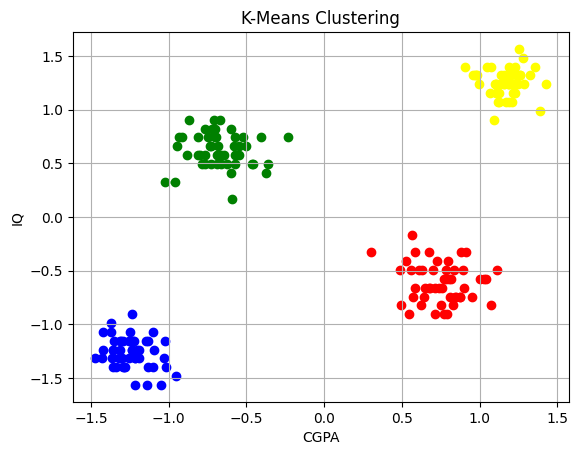

In [ ]:
# retrieves the values from the first column (feature) of the array X for the data points that are assigned to Cluster 0 according to the y_means , so on
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='blue')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='red')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')

plt.title('K-Means Clustering')

plt.xlabel('CGPA')
plt.ylabel('IQ')

plt.grid(True)

plt.show()

In [ ]:
df1['cluster'] = y_means
df1['cluster'].value_counts()

(cluster,)
0             50
1             50
2             50
3             50
dtype: int64

In [ ]:
df1.head()

,cgpa,iq,cluster
0,-1.144049,-1.153641,0
1,-0.668751,0.907168,2
2,0.849734,-0.741479,1
3,0.794180,-0.411750,1
4,-0.946522,0.659871,2


So, there are 200 data points ovreall and 50points belonging to cluster 4 (index 3), 50 points in cluster 2 (index 1), and so on.

## Inertia (Within-Cluster Sum of Squares):
Inertia measures the sum of squared distances between each data point and its assigned cluster's centroid. A lower inertia indicates tighter and more compact clusters. However, inertia alone may not be sufficient as it tends to decrease as the number of clusters increases.

In [ ]:
# Inertia (Within-Cluster Sum of Squares)
inertia = km.inertia_
print("Inertia:", inertia)

Inertia: 8.477237626556295


## Silhouette Score:
The silhouette score measures how similar each data point is to its own cluster compared to other clusters. A higher silhouette score indicates well-separated clusters. It ranges from -1 to +1, with higher values being better.

In [ ]:
# Silhouette Score
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, y_means)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.8605024348886897


# Davies-Bouldin Index

The Davies-Bouldin Index is a metric used to evaluate the performance of clustering algorithms. It measures the average similarity between each cluster and its most similar cluster, relative to the distance between their centroids. Lower values of the Davies-Bouldin Index indicate better clustering solutions, where clusters are well separated and distinct from each other.

Here's how the Davies-Bouldin Index is calculated for a set of clusters:

1. For each cluster `i`, calculate the average distance between its data points and the centroid of the cluster. This distance is usually measured using a chosen distance metric, such as Euclidean distance.

2. For each cluster `i`, find the cluster `j` (different from `i`) that has the highest similarity with cluster `i`. The similarity between two clusters is often calculated as the sum of the average distances of their data points to their respective centroids.

3. Calculate the Davies-Bouldin Index for cluster `i` as the ratio of the sum of the average distances of clusters `i` and `j` to the distance between their centroids:

   Davies-Bouldin Index (cluster `i`) = (Avg. distance `i` + Avg. distance `j`) / Centroid distance `i`-`j`

4. Calculate the Davies-Bouldin Index for all clusters and then compute the average of these individual indices to get the overall Davies-Bouldin Index for the entire clustering solution.

Interpreting the Davies-Bouldin Index:

- A lower Davies-Bouldin Index value indicates better clustering. When clusters are well-separated and distinct, the Davies-Bouldin Index will be lower.
- A higher Davies-Bouldin Index value suggests that clusters are overlapping or poorly separated, indicating a less effective clustering solution.
- The Davies-Bouldin Index does not have a specific range of values but is often in the range of 0 to infinity.

It's important to note that the Davies-Bouldin Index has limitations, such as sensitivity to the number of clusters and sensitivity to the shape of clusters. Therefore, it is recommended to use the Davies-Bouldin Index in conjunction with other clustering evaluation metrics, such as Silhouette Score and visual inspection of cluster separations, to make informed decisions about the quality of clustering results.

In [ ]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_kmeans = davies_bouldin_score(X,  y_means)
print("Davies_bouldin_score", davies_bouldin_kmeans)

Davies_bouldin_score 0.20101696935794028




---



# K-Means clustering on 2-D random generated Data

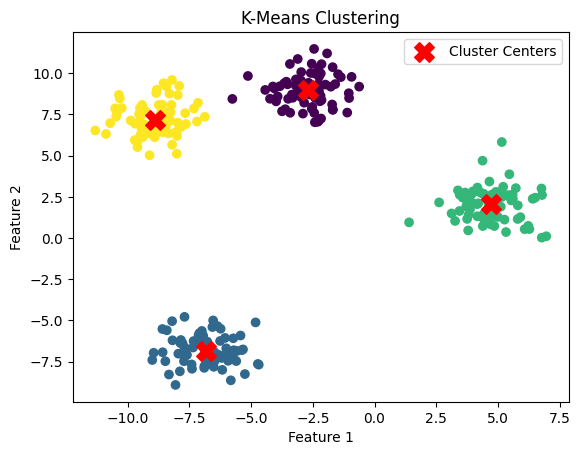

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic data
data, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Create a KMeans instance with the desired number of clusters
kmeans = KMeans(n_clusters=4)

# Fit the KMeans model to the data
kmeans.fit(data)

# Get cluster assignments for each data point
labels = kmeans.labels_

# Get the coordinates of the cluster centers
centers = kmeans.cluster_centers_

# Plot the data and cluster centers
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()


---

# K-Means clustering on 3-D random generated Data

In [ ]:
from sklearn.datasets import make_blobs

centroids = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]

X,y = make_blobs(n_samples=200, cluster_std=cluster_std, centers=centroids, n_features=3, random_state=1)

In [ ]:
import plotly.express as px
fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2])
fig.show()

In [ ]:
wcss = []
for i in range(1,21):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

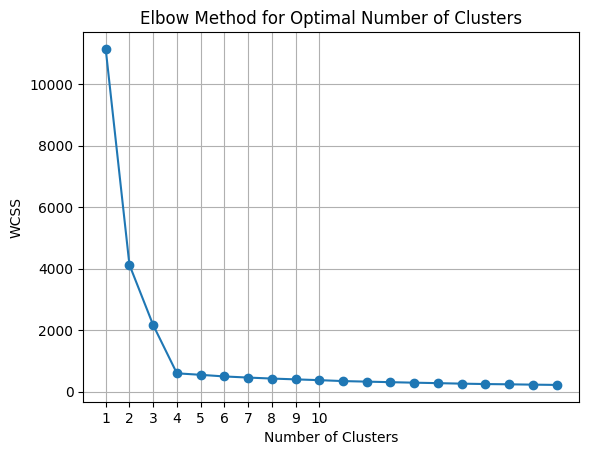

In [ ]:
plt.plot(range(1, 21), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))  # Set x-axis ticks to match the cluster range
plt.grid(True)

plt.show()


In [ ]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(X)

In [ ]:
df = pd.DataFrame()

df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]
df['label'] = y_pred

In [ ]:
fig = px.scatter_3d(df,x='col1', y='col2', z='col3',color='label')
fig.show()

Conclusion: The main objective of the K-Means clustering algorithm is to partition a given dataset into a predetermined number of clusters (K), where each data point belongs to the cluster with the nearest mean (centroid).


The objective is to minimize the sum of squared distances between data points and their respective cluster centroids. In other words, K-Means seeks to create clusters in such a way that data points within each cluster are close to each other (high intra-cluster similarity) and far from data points in other clusters (low inter-cluster similarity).


K-Means is widely used for various applications, such as customer segmentation, image compression, anomaly detection, and more, where finding natural groupings in data is important. It is a simple yet effective algorithm for clustering, and its objective aligns with the goal of creating well-defined and compact clusters.

## Thank you